#### Predict future rates with machine learning

In [7]:
#copied from main notebook - analysis one, when inserting into main notebook can remove and use same variables

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = ("https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_adult_smoking_habits_in_great_britain/Table_1a-Table_1_cleaned.csv")
smokers = pd.read_csv(url)
smokers.drop(['Unnamed: 0'], axis=1, inplace=True)
#Getting relevant columns for visualisation
adults=smokers[["Year", "All 16+"]]
adults_2000 = adults.loc[0:22]
adults_2000.rename(columns={"All 16+": "Smoking Rate"}, inplace=True)



C:\Users\Bonald\AppData\Local\Temp\ipykernel_18696\194096689.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_2000.rename(columns={"All 16+": "Smoking Rate"}, inplace=True)


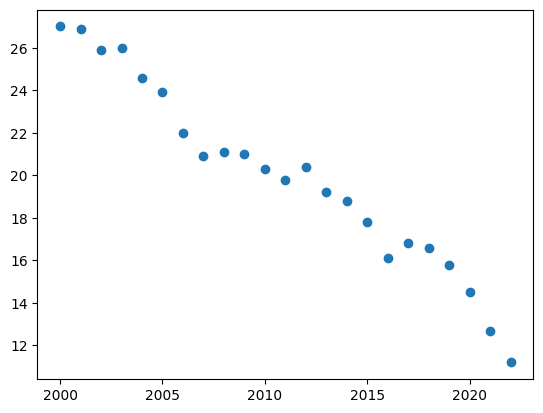

In [48]:
x = adults_2000['Year'] #independent variable
y = adults_2000['Smoking Rate'] #dependent variable 

In [51]:
#sk learn needs a 2D array to work, not 1D
#Reshape variables to 2D

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [84]:
#Split data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [85]:
#Create model and train the model with training sets
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [107]:
#View our slope coefficient and intercept value
print(model.coef_, model.intercept_)

[[-0.63122977]] [1289.48710895]


In [89]:
#Briefly evaluate model's performance

#Get the R^2 value, which describes how well the linear regression model fits the data points, the closer to 1
print(model.score(x_test,y_test))
#>0.9, strong R^2 score.  

print(model.coef_)


0.9184764364800353
[[-0.63122977]]


In [87]:
#Use testing set to create predictions
y_pred = model.predict(x_test)

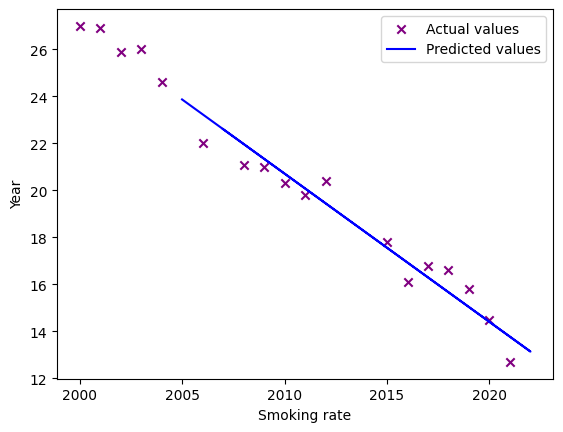

In [93]:
#Plot the linear regression 
plt.scatter(x_train, y_train,color='purple', marker="x", label="Actual values")
plt.plot(x_test, y_pred,color='b', label="Predicted values")
plt.ylabel("Year")
plt.xlabel("Smoking rate")
plt.legend()
plt.show()



In [105]:
#We can see that our algorithm is working correctly. We can now input values to the model to make predictions
#Predict what the UK smoking rate will be in 2030:

x_2030 = 2030
#convert to 2D array
x_2030_arr = np.array(x_2030).reshape(-1,1)
#Predict the y value (smoking rate)
y_pred_2030 = model.predict(x_2030_arr)

print(f"The predicted smoking rate in {x_2030} is {"%.2f"  %y_pred_2030[0][0]}%")

The predicted smoking rate in 2030 is 8.09%
